<a href="https://colab.research.google.com/github/saxenabhishek/haberman-survival-dataset/blob/master/cancerset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing libraries and checking version

In [1]:
import numpy as np
import sys 
import pandas as pd
import seaborn as sns
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
print(sys.version)

3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]


mounting drive to import dataset.
Change location accordingly to import the dataset as this is for now mounted as my drive.

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
data = pd.read_csv("drive/My Drive/CancerSet.csv")
#os.listdir("drive/My Drive/")
data.columns = ["Age","Oyear","nodes","stats"]
print(data.head(100))

    Age  Oyear  nodes  stats
0    34     58     30      1
1    37     58      0      1
2    39     58      0      1
3    40     58      0      1
4    40     58      2      1
..  ...    ...    ...    ...
95   52     62      0      1
96   52     62      1      1
97   54     62      0      1
98   54     62      0      1
99   57     62      0      1

[100 rows x 4 columns]


In [5]:
print(data.shape)

(305, 4)


In [6]:
print(data["stats"].unique())
print(data["stats"].value_counts())

[1 2]
1    224
2     81
Name: stats, dtype: int64


the data set in unbalanced

In [7]:

morestats = data.describe()
print(morestats)

              Age       Oyear       nodes       stats
count  305.000000  305.000000  305.000000  305.000000
mean    52.521311   62.868852    4.006557    1.265574
std     10.763320    3.242783    7.193287    0.442364
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     61.000000   66.000000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000


In [0]:
import matplotlib.pyplot as plt

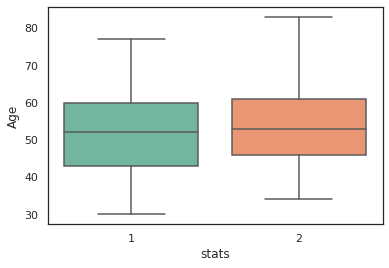

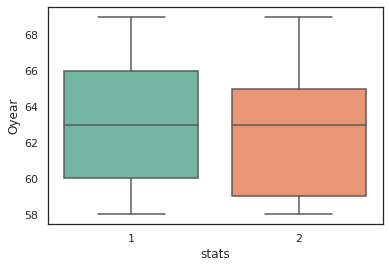

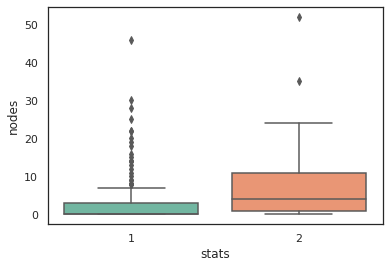

In [9]:
# sns.set(context='notebook', style='white', palette="ch:1,.7,1", font='sans-serif', font_scale=3, color_codes=True, rc=None)
sns.set(context='notebook', style='white', palette="Set2", font='sans-serif', font_scale=1, color_codes=True, rc=None)

sns.boxplot(x="stats", y="Age", data=data)
plt.show()
sns.boxplot(x="stats", y="Oyear", data=data)
plt.show()
sns.boxplot(x="stats", y="nodes", data=data)
plt.show()

boxplots show that there are no distinguishable parameters in the first two features but the number of nodes can be used to get a reliable result 

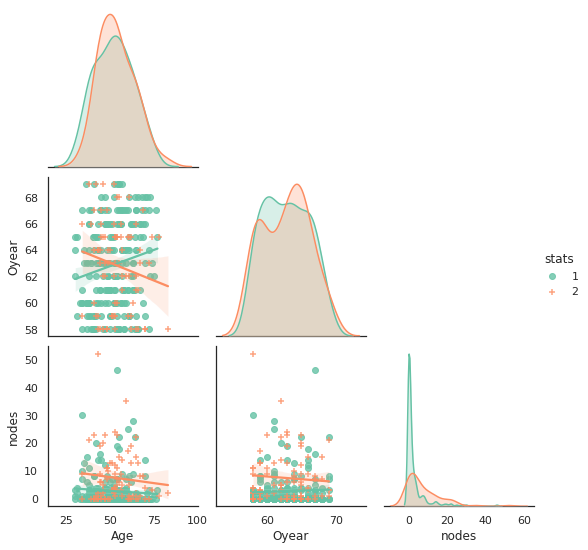

In [10]:
sns.pairplot(data, hue="stats",kind = "reg",corner=True, markers=["o","+"], diag_kind="auto")
plt.show()

pairplots show the same thing as above but now we know even bivarient plots are inconclusive.


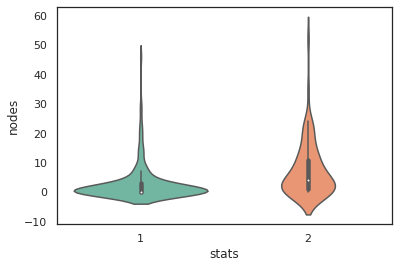

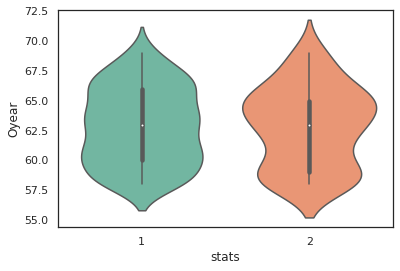

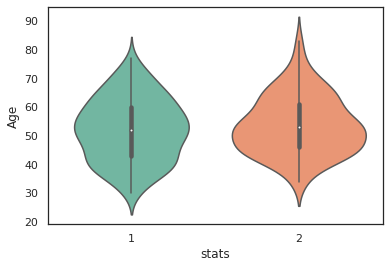

In [11]:
sns.violinplot(x="stats", y="nodes", data=data)
plt.show()
sns.violinplot(x="stats", y="Oyear", data=data)
plt.show()
sns.violinplot(x="stats", y="Age", data=data)
plt.show()

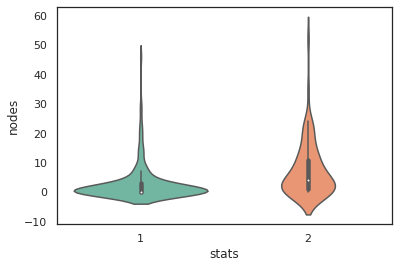

In [12]:
sns.violinplot(x=data.stats, y=data.nodes , data=data)

I used violin plots to show the slight difference between the frequency of nodes. I will use this as my primary feature.   

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


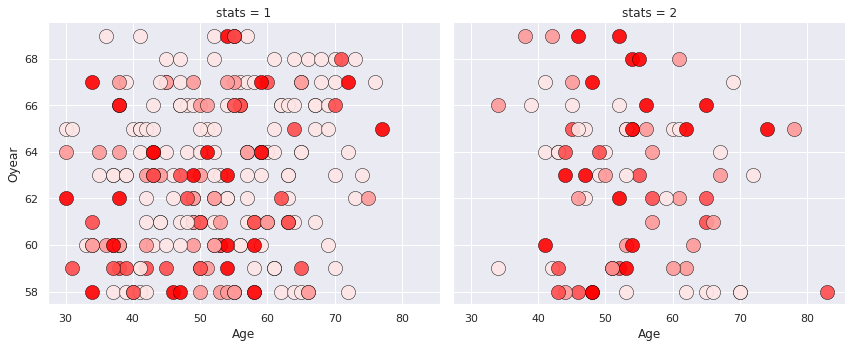

In [13]:
sns.set(style="darkgrid")
g = sns.FacetGrid(data,col="stats",hue = "nodes",size=5,aspect=1.2,palette=sns.light_palette("red",4))
g.map(plt.scatter,"Age","Oyear",s=200,edgecolor = "black",linewidth=0.5,alpha=0.9)
plt.show()

scatter plots between age and operation year. the color of the points is the color of the number of nodes. There are 4 divisions of node which decide the color of the point.
points of simmilar color are grouped together which means they contirbute some data to the result.

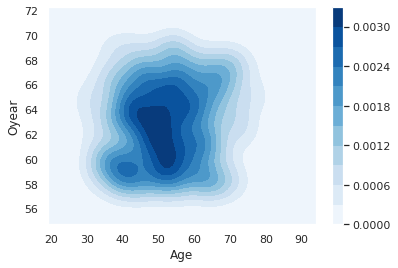

In [14]:
sns.set(style="darkgrid")
ax = sns.kdeplot(data["Age"],data["Oyear"],cbar=True,cmap="Blues",shade = True,shade_lowest=True)



In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [0]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3, 4)
        self.fc2 = nn.Linear(4, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.log_softmax(self.fc2(x),dim=1)
        return x
        


A simple feed forward network with 3 features as input and one hidden layer of 4 neurons with 2 output nodes each for the prediction.

making a copy of the data shuffling it, normalising it and spliting into training and testing 70 ,30.

In [17]:
inp = data.copy()
np.random.shuffle(inp.to_numpy())
inp["stats"] -= 1
inp["Age"] = inp["Age"]/100
inp["Oyear"] = inp["Oyear"]/100
inp["nodes"] = inp["nodes"]/100 
msk = np.random.rand(len(inp)) < 0.7
train = inp[msk]
test = inp[~msk]
print(train["stats"].value_counts())
print(test["stats"].value_counts())
print(len(train),len(test))


0    152
1     61
Name: stats, dtype: int64
0    72
1    20
Name: stats, dtype: int64
213 92


In [22]:
net = Net()
print(net)
y = torch.rand(1,3)
print(y)
net(y)

Net(
  (fc1): Linear(in_features=3, out_features=4, bias=True)
  (fc2): Linear(in_features=4, out_features=2, bias=True)
)
tensor([[0.1533, 0.8665, 0.7419]])


tensor([[-0.8172, -0.5828]], grad_fn=<LogSoftmaxBackward>)

i'm using a cross Entropy loss function with AdaDelta method to update weigths as it works better than adagrad.
The dataset is not balanced so using cross entropy makes sense because I can assign weights to different classes 

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss(weight = torch.tensor([0.275,1.0]),reduction="sum")
optimizer = optim.Adadelta(net.parameters())


Training

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys


Finished Training


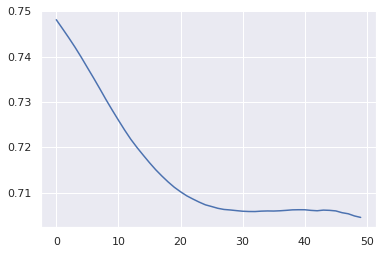

tensor([[-5.9194e+00, -2.6905e-03]], grad_fn=<LogSoftmaxBackward>)

In [26]:
dots = []
for epoch in range(50):  # loop over the dataset multiple times
    rn = 0
    for i in range(len(train)):
        x = torch.tensor([list(train.iloc[i])])
        lab = x[:,3]
        lab = torch.tensor(lab,dtype=torch.long)
        x = x[:,:3]
        optimizer.zero_grad()

        outputs = net(x)
        outputs=outputs.reshape(1,2)
        loss = criterion(outputs, lab)
        loss.backward()
        optimizer.step()

        rn += loss.item()
        
        if i % 100 == 99:    # print every 2000 mini-batches
            #print('[%d, %5d] loss: %f' %
                  #(epoch + 1, i + 1, rn/100))
            pass
            
    dots.append(rn/len(test))
print('Finished Training')
plt.plot(dots)
plt.show()
net(y)


Testing





In [27]:

A = 0
B = 0
C = 0
D = 0
idk = 0

#print(test.head(50))

for i in range(len(test)):
    x = torch.tensor([list(test.iloc[i])])
    lab = x [:,3]
    x = x[:,:3]

    out = net(x)
    # print(out[:,0] > out[:,1])
    if lab[0] == 0 and out[:,0] > out[:,1]: # pre was 0 and ans was 0 
        A += 1
    elif lab[0] == 1 and out[:,0] > out[:,1]: # pre was 1 but ans was 0
        B += 1
    elif lab[0] == 0 and out[:,0] < out[:,1]: # pre was 0 but ans was 1
        C += 1
    elif lab[0] == 1 and out[:,0] < out[:,1]: # pre was 1 and ans was 1
        D += 1
    else:
        idk += 1

stats = pd.DataFrame([[A, B], [C, D]],index=("0","1"),columns=["0","1"])


print("failed:",idk)
print("prediction on [Y] real on [X]")
print(stats)
print("")
print(test["stats"].value_counts())
print(len(test))


print("accuracy              ",(A+D)/len(test))


if A == 0:
    A = 1
    print("error")
if B == 0:
    B = 1
    print("error")
if C == 0:
    C = 1
    print("error")
if D == 0:
    D = 1
    print("error")

pre1 = A/(A+C)
pre2 = D/(D+B)
recall1 = A/(A+B)
recall2 = C/(C+D)

print("precision for 0:   ",pre1)
print("precision for 1:   ",pre2)
print("")
print("Recall for 0:      ",recall1)
print("Recall for 1:      ",recall2)
print("")
f11 = (2*pre1*recall1)/(pre1 + recall1)
f12 = (2*pre2*recall2)/(pre2 + recall2)

print("f1 score for 0:    ",f11)
print("f1 score for 1:    ",f12)

failed: 0
prediction on [Y] real on [X]
    0   1
0  54   8
1  18  12

0    72
1    20
Name: stats, dtype: int64
92
accuracy               0.717391304347826
precision for 0:    0.75
precision for 1:    0.6

Recall for 0:       0.8709677419354839
Recall for 1:       0.6

f1 score for 0:     0.8059701492537312
f1 score for 1:     0.6


with this model I usually  get a accuracy of 70% to 80%